# Продвинутый Python, семинар 4

**Лектор:** Петров Тимур

**Семинаристы:** Петров Тимур, Коган Александра, Романченко Полина

**Spoiler Alert:** в рамках курса нельзя изучить ни одну из тем от и до досконально (к сожалению, на это требуется больше времени, чем даже 3 часа в неделю). Но мы попробуем рассказать столько, сколько возможно :)

## Что сегодня делаем?

Продолжаем мучить данные с TFT. Давайте теперь исследовать наши данные с помощью визуализации!

И как мы говорили, здесь попробуем применить все силы seaborn, чтобы было красиво

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse

## А теперь к нашим баранам

Загрузим данные, заведем нужные нам столбцы

In [2]:
!wget https://github.com/Palladain/Deep_Python/raw/main/Seminars/Seminar_2/archive.zip

--2023-10-02 19:55:19--  https://github.com/Palladain/Deep_Python/raw/main/Seminars/Seminar_2/archive.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Palladain/Deep_Python/main/Seminars/Seminar_2/archive.zip [following]
--2023-10-02 19:55:19--  https://raw.githubusercontent.com/Palladain/Deep_Python/main/Seminars/Seminar_2/archive.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694969 (679K) [application/zip]
Saving to: ‘archive.zip’

archive.zip         100%[===================>] 678.68K  --.-KB/s    in 0.03s   

2023-10-02 19:55:20 (21.3 MB/s) - ‘archive.zip’ saved [694969/694969]


In [3]:
!unzip archive.zip

Archive:  archive.zip
  inflating: items.json              
  inflating: tft_3.5_last_500_gm_match_info.csv  
  inflating: tft_3.5_last_500_gm_unit_info.csv  
  inflating: traits.json             


In [4]:
heroes = pd.read_csv('tft_3.5_last_500_gm_unit_info.csv')

In [10]:
matches = pd.read_csv("tft_3.5_last_500_gm_match_info.csv")
matches["winner"] = (matches.placement <= 4).astype("int")
matches.game_datetime = matches.game_datetime.apply(lambda x: parse(x))
matches['hour'] = matches.game_datetime.apply(lambda x: x.hour)
matches['day'] = matches.game_datetime.apply(lambda x: x.day)
matches = matches.rename(lambda x: x.replace("Set3_", ""), axis='columns')

In [6]:
matches.head()

,match_id,puuid,challenger,galaxy,placement,game_datetime,Astro,Chrono,DarkStar,Set3_Celestial,...,Set3_Blademaster,Paragon,Protector,Set3_Sorcerer,StarGuardian,MechPilot,SpacePirate,winner,hour,day
0,NA1_3569517250,7AKHCtexkJJo8p04lg4shtx7n7R-uH6pQwPhBCEofkIJca...,0,Treasure Trove,1,2020-09-10 05:18:02,0,0,3,2,...,0,0,1,0,0,0,0,1,5,10
1,NA1_3569517250,0StQeXmDacsAikvEcY2ubarDZqzlEsaYsZHO6UT-UgBFY7...,0,Treasure Trove,2,2020-09-10 05:18:02,0,0,0,0,...,0,1,1,2,2,0,0,1,5,10
2,NA1_3569517250,Y0emdKI096n9-Rb0L4_I4pP_tmn_kwCtKiEjIsBRrxRqX_...,1,Treasure Trove,3,2020-09-10 05:18:02,0,1,0,0,...,0,0,0,0,0,0,0,1,5,10
3,NA1_3569517250,1vCCOdxLrdYa6NQRhywKKdZ0UNdX0nsa15Zpqo03k6QFs6...,1,Treasure Trove,4,2020-09-10 05:18:02,0,0,1,0,...,0,1,1,2,1,0,0,1,5,10
4,NA1_3569517250,mC0hMfKYhejc1U1aJE7iTOTn6TUDkY4apfQhdw2Pvp_jV3...,0,Treasure Trove,5,2020-09-10 05:18:02,0,0,0,1,...,0,1,1,0,0,0,0,0,5,10


Итак, в прошлый раз мы с вами обсуждали, что у нас challengers чаще побеждают. Давайте теперь попробуем это нарисовать и понять, а действительно ли это так.

Ради этого мы можем с вами нарисовать ящики с усами и проверить, насколько распределения challengers и остальных отличаются по занятому месту

### Задание 1

Нарисуйте ящик с усами и violinplot для challengers (на одном графике!)

Будем это делать теперь с помощью seaborn

In [7]:
sns.color_palette("tab10") #установим цвета (мне нравятся цвета из Tableau, поэтому возьму их)
sns.set_theme() # поставим дефолтную тему

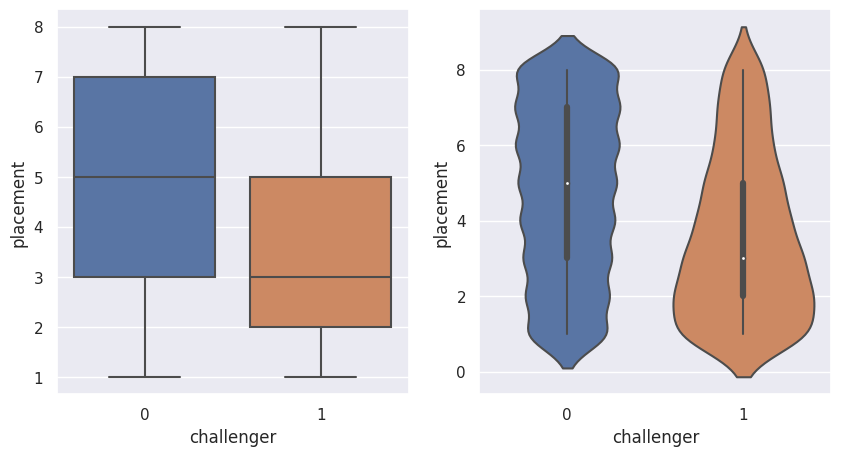

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.boxplot(data=matches, x='challenger', y='placement')
plt.subplot(122)
sns.violinplot(data=matches, x='challenger', y='placement')
plt.show()

Что мы сразу видим?

1. У нас медианы отличаются (для игроков более высокого уровня - 3, для остальных - 5)

2. Видим разброс другой (то есть от 3 до 7 места и от 2 до 5 места)

И благодаря violinplot становится еще понятнее, откуда идет скилл: у остальных распределение примерно одинаковое (то есть их место - это почти рандом), когда же у challengers мы видим более похожее на виолончель

Отлично, что-то уже накопали (и подтвердили). Идем дальше:

У нас есть колонки, которые мы никогда не трогали, давайте теперь пощупаем их

In [11]:
matches.columns #не щупали все от Astro до SpacePirate

Index(['match_id', 'puuid', 'challenger', 'galaxy', 'placement',
       'game_datetime', 'Astro', 'Chrono', 'DarkStar', 'Celestial', 'Mystic',
       'Sniper', 'Vanguard', 'Cybernetic', 'Infiltrator', 'ManaReaver',
       'Battlecast', 'Blaster', 'Brawler', 'Rebel', 'Starship',
       'Demolitionist', 'Mercenary', 'Blademaster', 'Paragon', 'Protector',
       'Sorcerer', 'StarGuardian', 'MechPilot', 'SpacePirate', 'winner',
       'hour', 'day'],
      dtype='object')

Это колонки с особенностями. По сути своей, особенность дает какой-то бонус некоторым чемпионам или всем сразу. Давайте посмотрим, есть ли какие-нибудь эффективные особенности. Как это сделать?

### Задание 2

Выберите неизученные столбцы и посмотрите зависимость между местом и значением в столбце

Сделайте вывод, есть ли зависимость с какими-либо столбцами

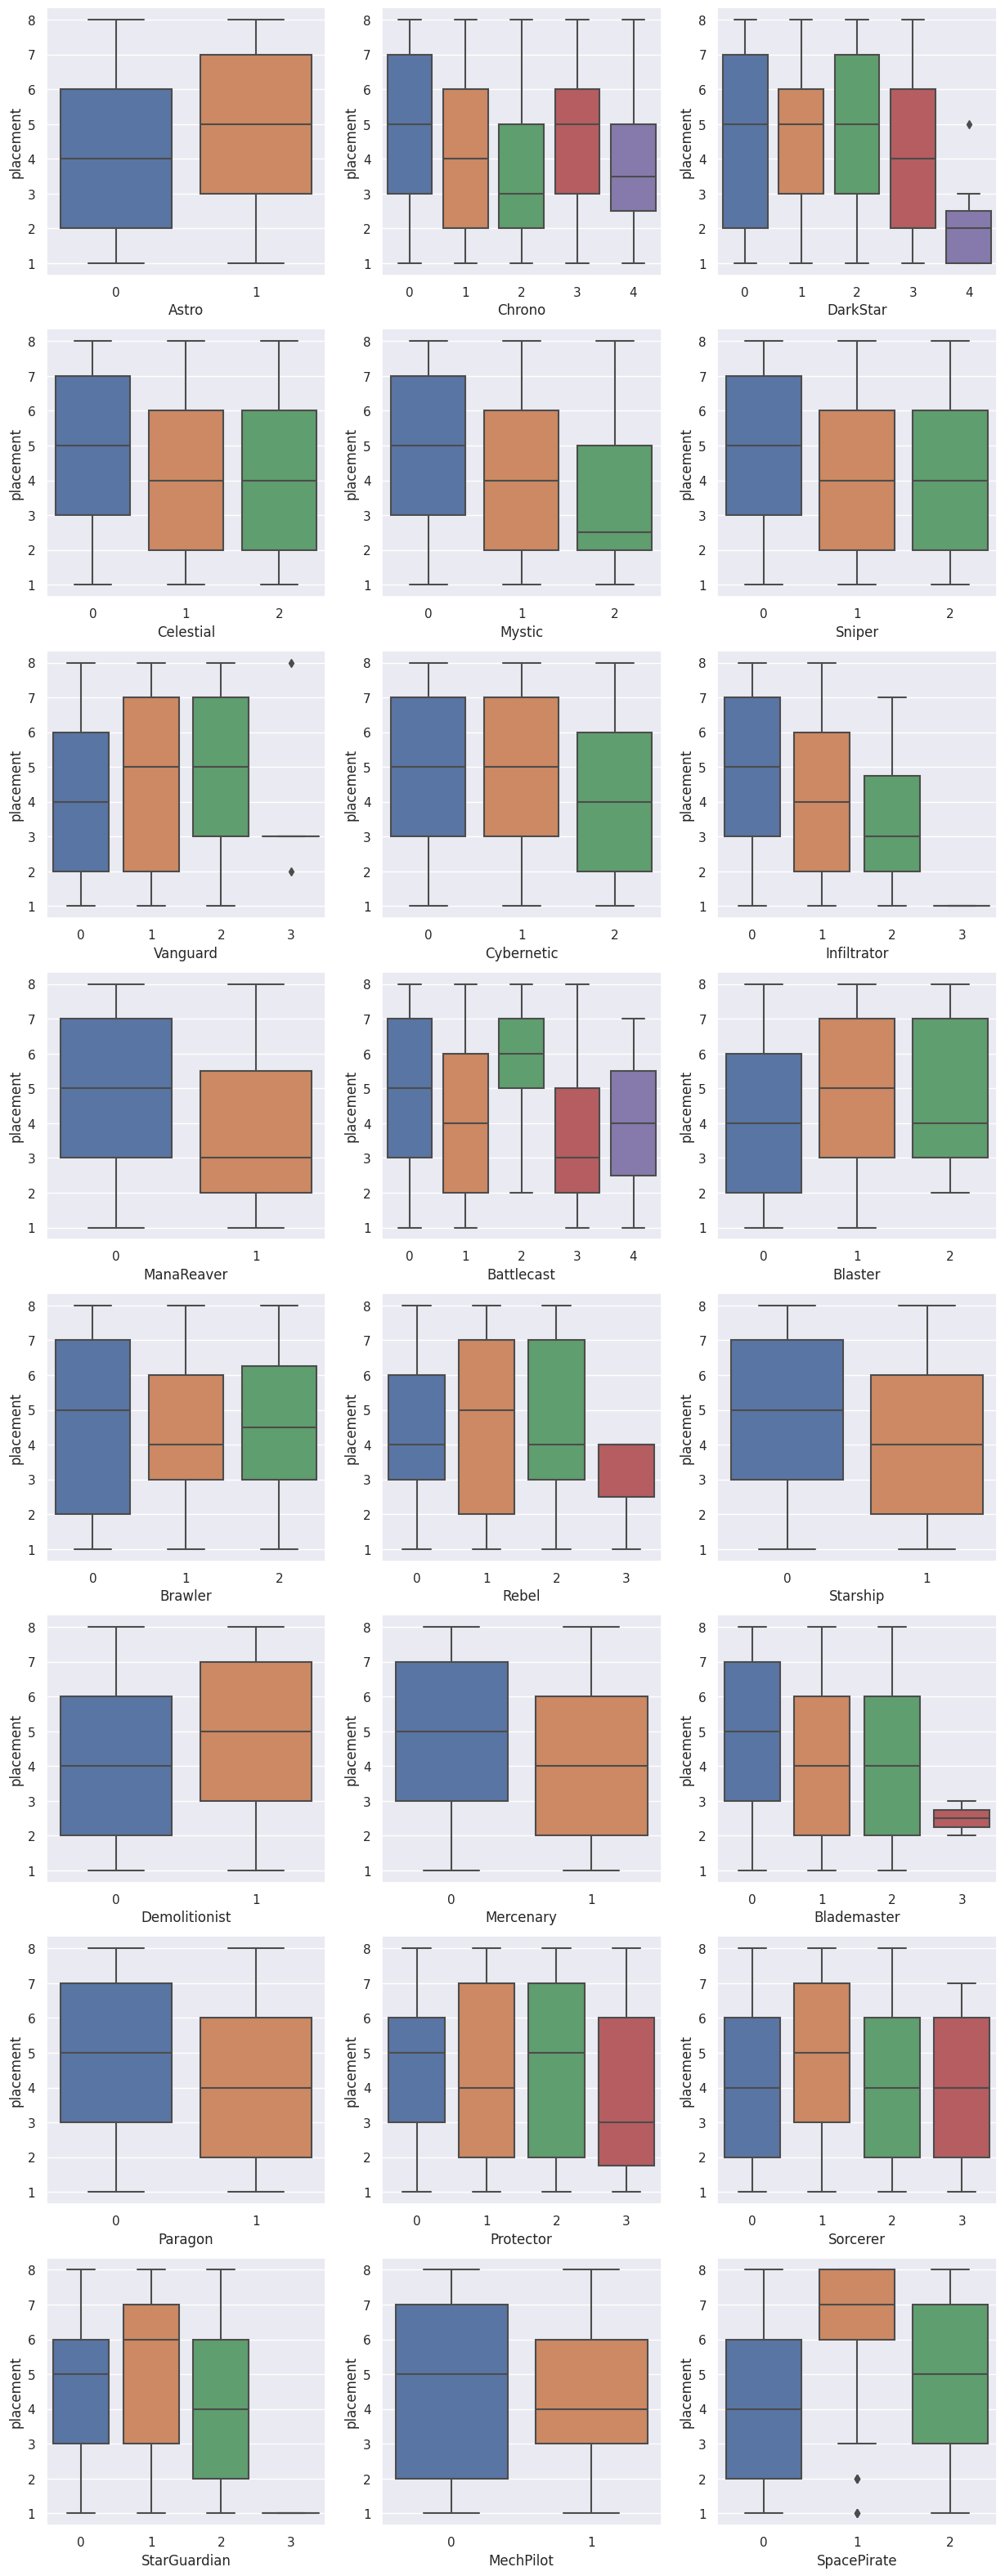

In [12]:
cols = ['Astro', 'Chrono', 'DarkStar', 'Celestial',
       'Mystic', 'Sniper', 'Vanguard', 'Cybernetic', 'Infiltrator',
       'ManaReaver', 'Battlecast', 'Blaster', 'Brawler', 'Rebel',
       'Starship', 'Demolitionist', 'Mercenary', 'Blademaster', 'Paragon',
       'Protector', 'Sorcerer', 'StarGuardian', 'MechPilot',
       'SpacePirate']

plt.figure(figsize=(15, 40))
for i, col in enumerate(cols):
    plt.subplot(8, 3, i + 1)
    sns.boxplot(data=matches, x=col, y="placement")
plt.show()

Выводы: Какие из указанных особенностей работают?

Теперь поисследуем часы и дни (не зря же их выносили)

### Задание 3

Посмотрите на динамику числа игр в разрезе часов и также отобразите число игр по дням, а также число игр по галактикам

(Первое можно сделать в помощью линий, второе - с помощью bar chart)

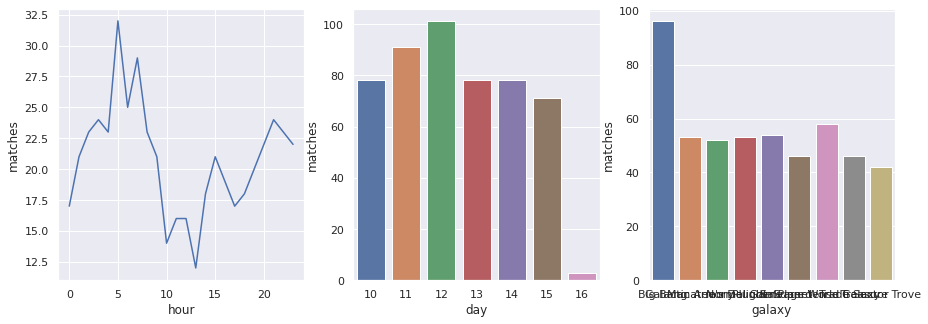

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.lineplot(data=matches.groupby("hour") \
    .agg({"match_id": "nunique"}) \
    .reset_index() \
    .rename(columns={"match_id": "matches"}) \
    , x="hour", y="matches")
plt.subplot(132)
sns.barplot(data=matches.groupby("day") \
    .agg({"match_id": "nunique"}) \
    .reset_index() \
    .rename(columns={"match_id": "matches"}) \
    , x="day", y="matches")
plt.subplot(133)
sns.barplot(data=matches.groupby("galaxy") \
    .agg({"match_id": "nunique"}) \
    .reset_index() \
    .rename(columns={"match_id": "matches"}) \
    , x="galaxy", y="matches")
plt.show()

Ой как нехорошо получилось с галактиками! Давайте поправим этот момент!

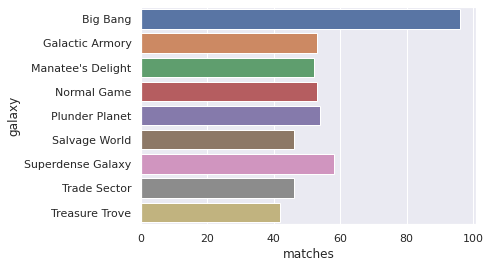

In [ ]:
sns.barplot(data=matches.groupby("galaxy") \
    .agg({"match_id": "nunique"}) \
    .reset_index() \
    .rename(columns={"match_id": "matches"}) \
    , x="matches", y="galaxy")
plt.show()

**Как вы думаете, а почему получилось так странно со временем?**

**А какой вывод мы можем сделать из числа дней?**

**Обратите внимание, что мы никаким образом не анализировали и не использовали поле Galaxy в зависимости от места. Как вы думаете, почему? (подсказка: галактика общая для 1 игры)**


### Задание 4

Посмотрите зависимость среднего места между галактикой и местом для challengers и для не challengers

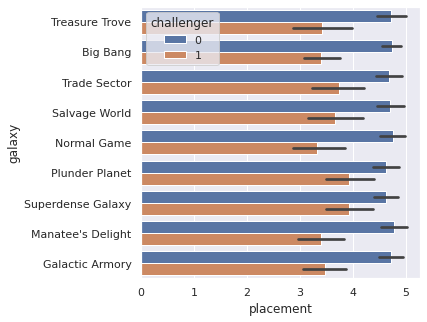

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(data=matches, x="placement", y="galaxy", hue="challenger")
plt.show()

Ух ты ж, у нас легенда куда-то поехала, давайте поправим!

(Как увеличить легенду саму по себе? Никак :с
Можно только применять fontsize и таким образом увеличить легенду за счет увеличения текста)

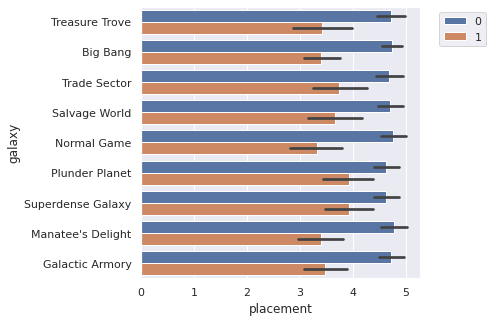

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(data=matches, x="placement", y="galaxy", hue="challenger")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

Класс, получили красивый график!

Вспомним, что у нас еще есть не только композиции, но и сами герои, а также предметы!

### Задание 5

Отобразите число героев по трейтам и отсортируйте по убыванию

Трейты - особенности самих героев. Находятся в полях traits_1, traits_2, traits_3

Как же это сделать, ведь у нас несколько колонок, с которыми надо считать? Для этого можем сделать конкатенацию этих трех полей и посчитать (каждый трейт героя - уникальный)

In [ ]:
heroes.head(5)

,match_id,puuid,champion,tier,item_set_1,item_set_2,item_set_3,traits_1,traits_2,traits_3
0,NA1_3576421406,E9vhtL_T6i81fD7EmWshNbUUNuf_gstpkSUI17IcbLW43e...,Caitlyn,1,68.0,88.0,NaN,Chrono,Sniper,NaN
1,NA1_3576421406,E9vhtL_T6i81fD7EmWshNbUUNuf_gstpkSUI17IcbLW43e...,Nautilus,2,27.0,59.0,NaN,Astro,Vanguard,NaN
2,NA1_3576421406,E9vhtL_T6i81fD7EmWshNbUUNuf_gstpkSUI17IcbLW43e...,Ashe,2,26.0,NaN,NaN,Celestial,Sniper,NaN
3,NA1_3576421406,E9vhtL_T6i81fD7EmWshNbUUNuf_gstpkSUI17IcbLW43e...,Karma,2,46.0,NaN,NaN,Dark Star,Mystic,NaN
4,NA1_3576421406,E9vhtL_T6i81fD7EmWshNbUUNuf_gstpkSUI17IcbLW43e...,Soraka,2,NaN,NaN,NaN,Star Guardian,Mystic,NaN


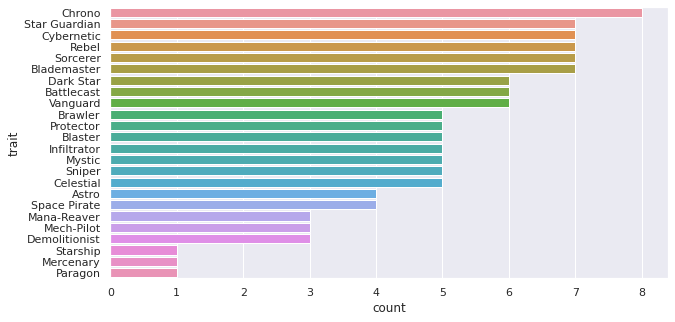

In [ ]:
fig = plt.figure(figsize=(10, 5))
res = pd.DataFrame( \
pd.concat( \
            [ \
                heroes[["champion", "traits_1"]].rename(columns={"traits_1": "trait"}), \
                heroes[["champion", "traits_2"]].rename(columns={"traits_2": "trait"}), \
                heroes[["champion", "traits_3"]].rename(columns={"traits_3": "trait"}) \
            ] \
))
res = res.drop_duplicates()
res = res[res.trait.notna()]
sns.countplot(data=res, y="trait", order= res["trait"].value_counts().index)
plt.show()

Выяснили, каких чемпионов у нас больше всего. Теперь давайте попробуем выяснить, а насколько хорош чемпион

У каждого чемпиона есть такая вещь как tier. Tier - это уровень чемпиона (он бывает в значениях от 1 до 3, чем больше - тем сильнее герой). Давайте теперь попробуем проделать следующую вещь:

### Задание 6

Возьмем и посчитаем для каждого чемпиона и его тира средний винрейт, а также частоту его встречаемости. Проверим - чем реже встречается герой, тем чаще ли он дает шанс на победу

*первую часть задания мы делали - считали винрейт для каждого чемпиона, код можно взять с предыдущего семинара, добавив в groupby tier*

*Дальше это надо сджойнить с матчами и героями и отобразить этот средний винрейт*

In [13]:
merged_matches = pd.merge(matches, heroes, on=['match_id', 'puuid'], how='inner')
avg_winrate = merged_matches.groupby(["champion", "tier"]).agg({"winner": "mean", "match_id": "nunique"}) \
        .reset_index() \
        .rename(columns={"winner": "chance_win", "match_id":"matches"})
avg_winrate.matches /= len(matches.match_id.unique())

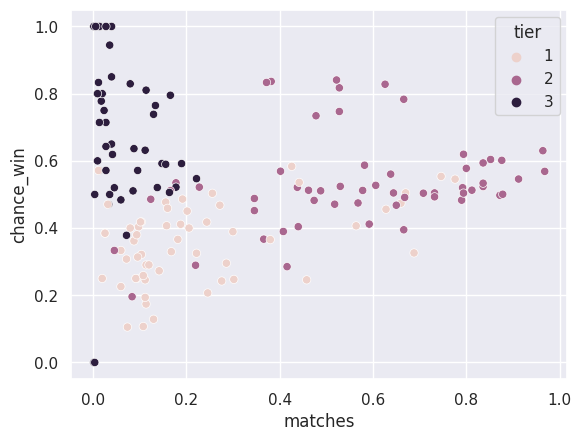

In [14]:
plt.figure()
sns.scatterplot(data=avg_winrate, x='matches', y='chance_win', hue="tier")
plt.show()

Что же видим?

Наличие tier 3 и tier 2 героев дает нам больше шансов на победу. Следовательно, хотим больше героев tier 3, верно? Но получить их не так просто


### Задание 7

Исследуйте средней tier чемпионов на поле у игрока и его место в игре, сделайте выводы

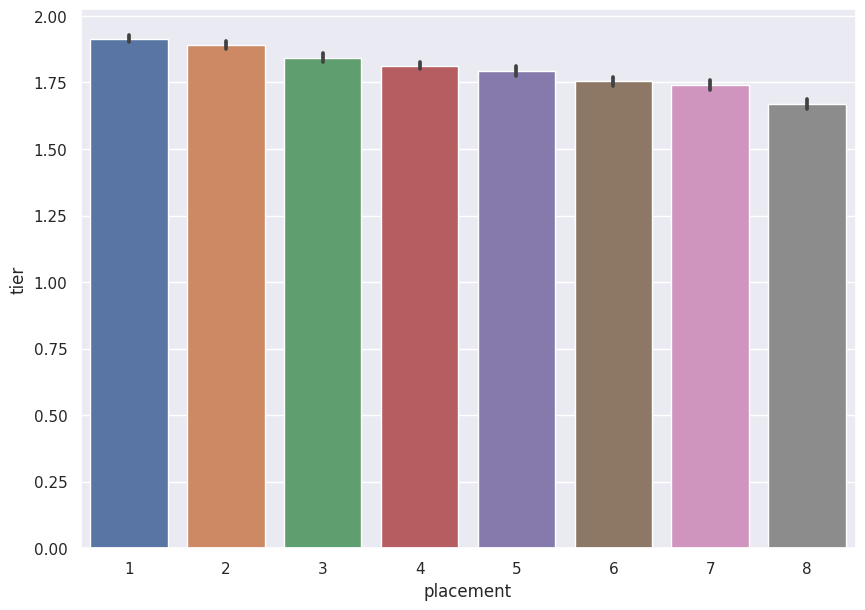

In [15]:
fig = plt.figure(figsize=(10, 7))
res = merged_matches.groupby(["match_id", "puuid", "placement"]).agg({"tier": "mean"}).reset_index()
sns.barplot(data=res, x='placement', y="tier")
plt.show()